# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [138]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [139]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("news_api")
type(api_key)

str

In [140]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)    

In [141]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
bitcoin_news["totalResults"]



4555

In [142]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)
ethereum_news['totalResults']

1233

In [143]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ElaineKellerman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [144]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({"Text": text, "Date": date, "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Title Bitcoin": title})
        
    except AttributeError:
        pass
    
#DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Bitcoin","Text","Date"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date
0,0.6369,0.000,0.838,0.162,Is the New Visa Bitcoin Rewards Card Worth It?,visa has partnered with cryptocurrency startup...,2020-12-03
1,0.2023,0.000,0.950,0.050,"Bitcoin is flirting with $20,000 again. How hi...","in november 2017, after an absolutely massive,...",2020-11-20
2,0.0000,0.000,1.000,0.000,You can now spend China's digital currency at ...,"unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06
3,0.4404,0.075,0.773,0.152,Bitcoin Could Hit $20K Again But This Time No ...,if youve been watching the crypto markets over...,2020-11-25
4,0.0000,0.000,1.000,0.000,With investors expecting a Latin American cryp...,six years after the launch of the mexico-based...,2020-12-09


In [145]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({"Text": text, "Date": date, "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Title Ethereum": title})
        
    except AttributeError:
        pass
    
#DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Ethereum","Text","Date"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date
0,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,file photo: representation of the ethereum vir...,2020-11-23
1,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,file photo: representation of the ethereum vir...,2020-11-23
2,0.4215,0.0,0.912,0.088,Smaller digital coins soar as bitcoin powers o...,london (reuters) - digital currencies ethereum...,2020-11-23
3,0.1779,0.0,0.948,0.052,Crypto fund inflows hit second highest on reco...,new york (reuters) - institutional investors p...,2020-12-07
4,0.1779,0.0,0.948,0.052,Crypto fund inflows hit second highest on reco...,new york (reuters) - institutional investors p...,2020-12-07


In [146]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.194484,0.003947,0.945316,0.050737
std,0.266427,0.017206,0.077066,0.069277
min,0.000000,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.897500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.075000,1.000000,0.174000


In [147]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.102920,0.025750,0.916550,0.057700
std,0.299156,0.054482,0.104965,0.076181
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.878000,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.226300,0.011750,1.000000,0.087250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [148]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [149]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ElaineKellerman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [150]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'service', 'million'}

In [162]:
# Complete the tokenizer function
def tokenizer(text):
    tokens=[]
    """Tokenizes text."""

    words_list = word_tokenize(text)


    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    words =word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]

    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]

    
    return tokens


In [163]:
# Create a new tokens column for bitcoin
# Create a new tokens column for bitcoin

bitcoin_tokens = bitcoin_df.copy()

token_btc = []
for i in bitcoin_tokens['Text']:
    token_articles = tokenizer(i)
    token_btc.append({'tokens':token_articles})
    
tokens_df= pd.DataFrame(token_btc)
bitcoin_tokens['tokens_text'] = tokens_df

token_btc = []
for i in bitcoin_tokens['Title Bitcoin']:
    token_articles = tokenizer(i)
    token_btc.append({'tokens title':token_articles})
    
tokens_df= pd.DataFrame(token_btc)
bitcoin_tokens['tokens_title'] = tokens_df

bitcoin_tokens.head()


,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date,tokens_text,tokens_title
0,0.6369,0.000,0.838,0.162,Is the New Visa Bitcoin Rewards Card Worth It?,visa has partnered with cryptocurrency startup...,2020-12-03,"[visahas, partnered, cryptocurrency, startup, ...","[new, visa, bitcoin, rewards, card, worth]"
1,0.2023,0.000,0.950,0.050,"Bitcoin is flirting with $20,000 again. How hi...","in november 2017, after an absolutely massive,...",2020-11-20,"[november, absolutely, massive, twomonth, rall...","[bitcoin, flirting, high, go, time]"
2,0.0000,0.000,1.000,0.000,You can now spend China's digital currency at ...,"unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,"[unlike, conventional, cryptocurrencies, centr...","[spend, chinas, digital, currency, online, store]"
3,0.4404,0.075,0.773,0.152,Bitcoin Could Hit $20K Again But This Time No ...,if youve been watching the crypto markets over...,2020-11-25,"[youve, watching, crypto, market, past, week, ...","[bitcoin, could, hit, k, time, one, cares]"
4,0.0000,0.000,1.000,0.000,With investors expecting a Latin American cryp...,six years after the launch of the mexico-based...,2020-12-09,"[six, year, launch, mexicobased, crypotcurrenc...","[investor, expecting, latin, american, cryptoc..."


In [164]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_tokens = ethereum_df.copy()
token_eth = []
for i in ethereum_tokens['Text']:
    token_articles = tokenizer(i)
    token_eth.append({'tokens':tokenized_articles})
    
tokens_eth= pd.DataFrame(token_eth)
ethereum_tokens['tokens_text'] = tokens_eth

token_eth = []
for i in ethereum_tokens['Title Ethereum']:
    token_articles = tokenizer(i)
    token_eth.append({'tokens_title':token_articles})
    
tokens_eth= pd.DataFrame(token_eth)
ethereum_tokens['tokens_title'] = tokens_eth

ethereum_tokens.head()




,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date,tokens_text,tokens_title
0,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,file photo: representation of the ethereum vir...,2020-11-23,"[chain, block, erupters, used, bitcoin, mining...","[smaller, digital, coin, soar, bitcoin, power,..."
1,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,file photo: representation of the ethereum vir...,2020-11-23,"[chain, block, erupters, used, bitcoin, mining...","[smaller, digital, coin, soar, bitcoin, power,..."
2,0.4215,0.0,0.912,0.088,Smaller digital coins soar as bitcoin powers o...,london (reuters) - digital currencies ethereum...,2020-11-23,"[chain, block, erupters, used, bitcoin, mining...","[smaller, digital, coin, soar, bitcoin, power,..."
3,0.1779,0.0,0.948,0.052,Crypto fund inflows hit second highest on reco...,new york (reuters) - institutional investors p...,2020-12-07,"[chain, block, erupters, used, bitcoin, mining...","[crypto, fund, inflow, hit, second, highest, r..."
4,0.1779,0.0,0.948,0.052,Crypto fund inflows hit second highest on reco...,new york (reuters) - institutional investors p...,2020-12-07,"[chain, block, erupters, used, bitcoin, mining...","[crypto, fund, inflow, hit, second, highest, r..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [101]:
from collections import Counter
from nltk import ngrams

In [170]:
# Generate the Bitcoin N-grams where N=2

bitcoin_grams = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        bitcoin_grams.append(word)

eth_grams = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        eth_grams.append(word)


In [172]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    token_bigstring = tokenizer(big_string)
    bigrams = ngrams(token_bigstring, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])



In [150]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [176]:
bigram_counter(bitcoin_grams)

,bigram,count
0,"(virtual, currency)",8
1,"(photo, representation)",7
2,"(representation, virtual)",5
3,"(currency, bitcoin)",5
4,"(illustration, taken)",5
5,"(char, reuters)",4
6,"(seen, illustration)",4
7,"(reutersdado, ruvicillustrationlondon)",4
8,"(ruvicillustrationlondon, reuters)",4
9,"(reuters, char)",4


In [178]:
bigram_counter(eth_grams)

,bigram,count
0,"(chain, block)",20
1,"(block, erupters)",20
2,"(erupters, used)",20
3,"(used, bitcoin)",20
4,"(bitcoin, mining)",20
5,"(mining, pictured)",20
6,"(pictured, plug)",20
7,"(plug, play)",20
8,"(play, tech)",20
9,"(tech, center)",20


In [179]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

def token_count (tokens, N=10):
    return Counter(tokens).most_common(N)



In [180]:
token_count(bitcoin_grams)

[('char', 19),
 ('bitcoin', 13),
 ('reuters', 11),
 ('currency', 10),
 ('representation', 8),
 ('virtual', 8),
 ('photo', 7),
 ('illustration', 7),
 ('reutersdado', 7),
 ('taken', 6)]

In [181]:
token_count(eth_grams)

[('chain', 20),
 ('block', 20),
 ('erupters', 20),
 ('used', 20),
 ('bitcoin', 20),
 ('mining', 20),
 ('pictured', 20),
 ('plug', 20),
 ('play', 20),
 ('tech', 20)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

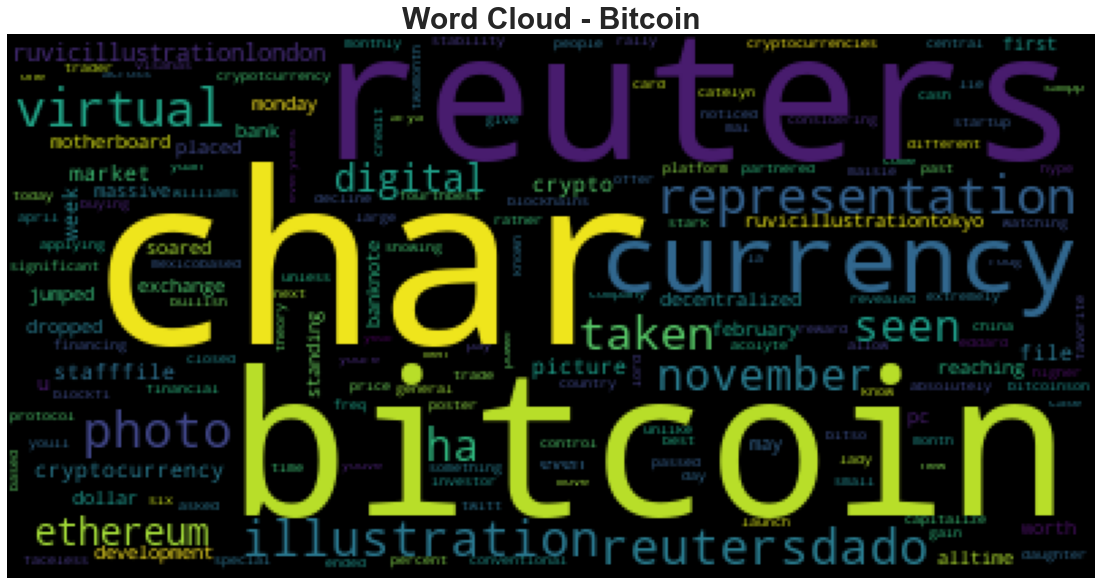

In [191]:
# Generate the Bitcoin word cloud
btc_wordcloud = ' '.join(bitcoin_grams)


word_cloud = WordCloud(collocations=False).generate(btc_wordcloud)
fig = plt.figure()
plt.imshow(word_cloud)
plt.title('Word Cloud - Bitcoin', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

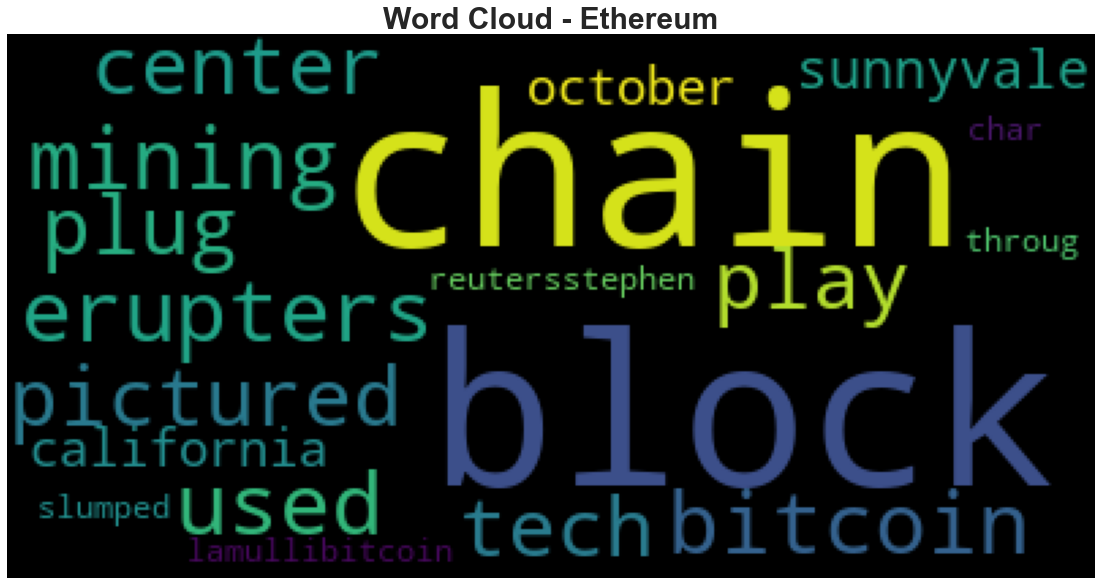

In [193]:
# Generate the Ethereum word cloud

eth_wordcloud = ' '.join(eth_grams)


word_cloud = WordCloud(collocations=False).generate(eth_wordcloud)
fig = plt.figure()
plt.imshow(word_cloud)
plt.title('Word Cloud - Ethereum', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [194]:
import spacy
from spacy import displacy

In [195]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [196]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [197]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_wordcloud

'visahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish char november absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug char unlike conventional cryptocurrencies central bank control digital yuan case people bank china move give country power theory stability freq char youve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal char six year launch mexicobased crypotcurrency exchange financial platform bitso company revealed ha closed financing capitalize crypto char decentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la char u market ended november large gain even small decline today sampp jumped percent november best monthly showing since april fourthbe

In [200]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_doc=nlp(btc_wordcloud)
ner_doc.user_data['title'] = 'Bitcoin NER'

displacy.render(ner_doc, style='ent')


In [207]:
# List all Entities
# YOUR CODE HERE!
for ent in ner_doc.ents:
    print (ent, ent.label_)

visahas partnered cryptocurrency startup blockfi ORG
first ORDINAL
bitcoin GPE
november DATE
first ORDINAL
next day DATE
central bank ORG
digital yuan ORG
past week DATE
bitcoin GPE
hype lie general mal ORG
six year DATE
november DATE
today DATE
november DATE
monthly DATE
april fourthbest month DATE
williams PERSON
arya stark PERSON
lady catelyn lord PERSON
eddard acolyte PERSON
monday DATE
twitt char ORG
tuesday DATE
evening TIME
december DATE
chavez PERSON
justin harperbusiness PERSON
bbc newsimage PERSON
digital ORG
cur PRODUCT
bitcoin GPE
headline week DATE
november DATE
reutersdado ruvicillustrationtokyo ORG
reuters bitcoin ORG
february DATE
reutersdado ruvicillustrationlondon ORG
london reuters ORG
monday DATE
reutersdado ruvicillustrationlondon reuters PERSON
reuters ORG
february DATE
reutersdado ruvicillustrationlondon reuters ORG
reuters ORG
november DATE
reutersdado ruvicillustrationtokyo ORG


## Ethereum NER

In [208]:
# Concatenate all of the bitcoin text together
eth_wordcloud

'chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california october reutersstephen lamullibitcoin slumped throug char chain block erupters used bitcoin mining pictured plug play tech center sunnyvale california 

In [209]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc_eth = nlp(eth_wordcloud)
doc_eth.user_data["title"] = "Ethereum NER"


In [210]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [211]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_eth.ents:
    print(ent, ent.label)

sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 384
october 391
reutersstephen lamullibitcoin 380
sunnyvale 384
california 